
*   TRABAJAREMOS SOBRE UN DATASET CON DATOS DE vinos.
*   Se llama Wine y está en el repositorio de datos de la UCI.
*   Tiene 178 muestras de 3 tipos diferentes de uvas cultivadas en la misma región italiana pero procedentes de distintos viñedos, descritas por 13 características.
*   LA IDEA ES APRENDER A RECONOCER LAS CARACTERÍSTICAS DE LOS tres tipos de uvas, APRENDIENDO DE LAS CARACTERÍSTICAS DEL DATASET.

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names

In [26]:
# https://medium.com/@hhkhaleel/logistic-regression-vs-svms-8ef1a7b65e05
# CARGAMOS LAS LIBRERÍAS QUE USAREMOS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve


In [27]:
# SUBIMOS Y CARGAMOS EL DATASET
vino = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
vino.columns=['class_label','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
              'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
              'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print(f'Forma: {vino.shape}')
print(f'Columnas: {vino.columns}')
vino

Forma: (178, 14)
Columnas: Index(['class_label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


,class_label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [28]:
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class_label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
vino.describe().T

,count,mean,std,min,25%,50%,75%,max
class_label,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [29]:
# VEMOS SI HAY VALORES NULL O NaN
print(f"¿Tiene datos en null o NaN? {vino.isnull().any().any()}")
print(f"¿Cuántos datos son null o NaN? {vino.isnull().sum().sum()}")
print("¿Qué columnas poseen null o NaN?")
display(vino.isnull().any())

¿Tiene datos en null o NaN? False
¿Cuántos datos son null o NaN? 0
¿Qué columnas poseen null o NaN?


class_label                     False
Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
dtype: bool

In [7]:
# VEAMOS QUÉ VALORES HAY EN 'class_label'
print(vino['class_label'].unique())


[1 2 3]


In [ ]:
# VEMOS COMO 'se ve' EL DATASET
sns.pairplot(vino, kind='count', corner=True)

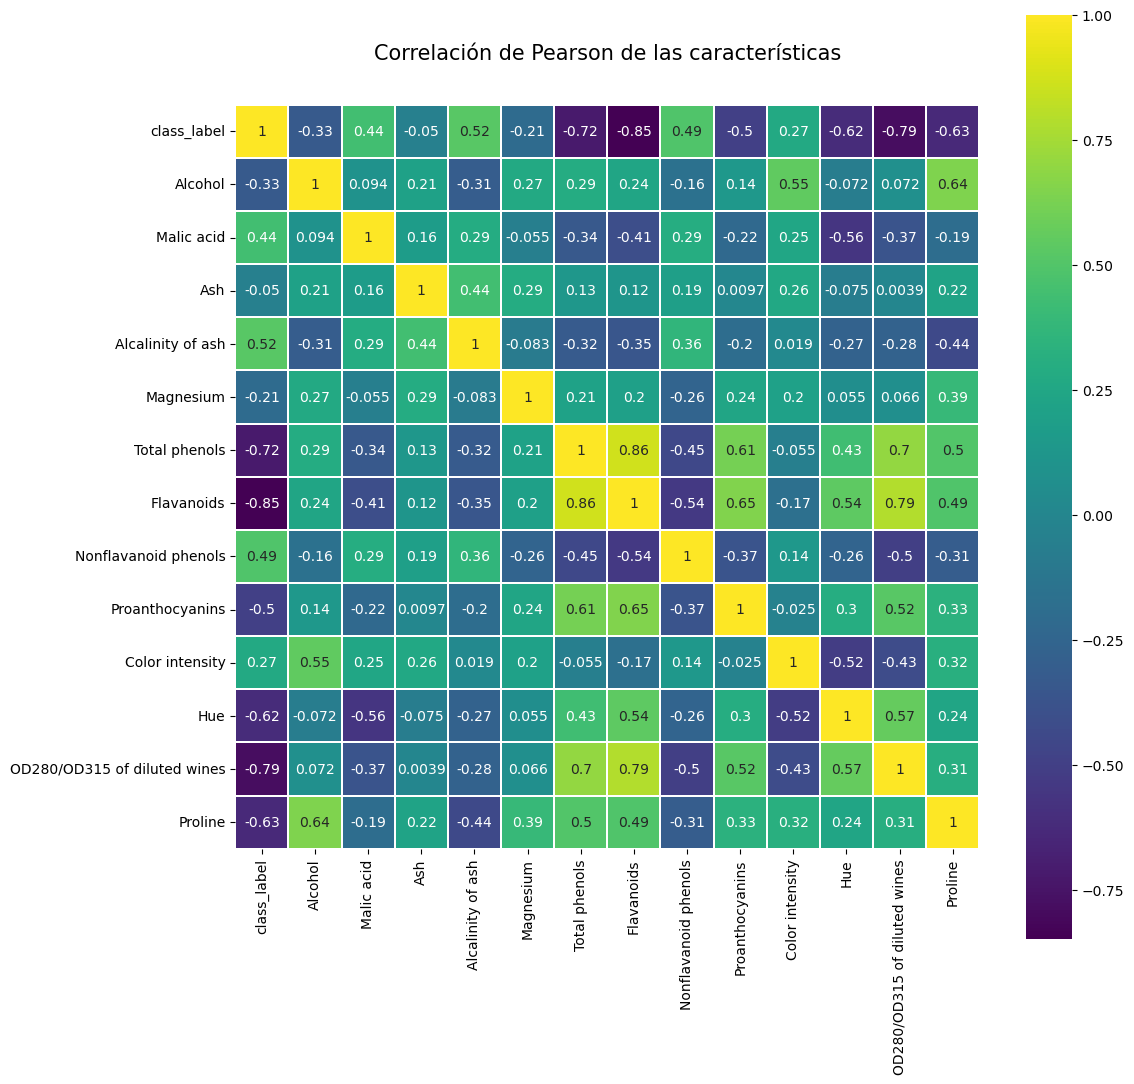

In [9]:
# Veamos si hay correlaciones
colormap = plt.cm.viridis   # mapa de colores
plt.figure(figsize = (12,12))
plt.title('Correlación de Pearson de las características', y = 1.05, size = 15)
sns.heatmap(vino.corr(), linewidths = 0.1, vmax = 1.0, square = True,
            cmap = colormap,linecolor = 'white', annot = True)
plt.show()


class_label
1    59
2    71
3    48
dtype: int64


/var/folders/fy/60bqycgj6lv4hqpj9smr9f880000gn/T/ipykernel_21612/812491579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='class_label', data = vino, kind = "count", palette='inferno')


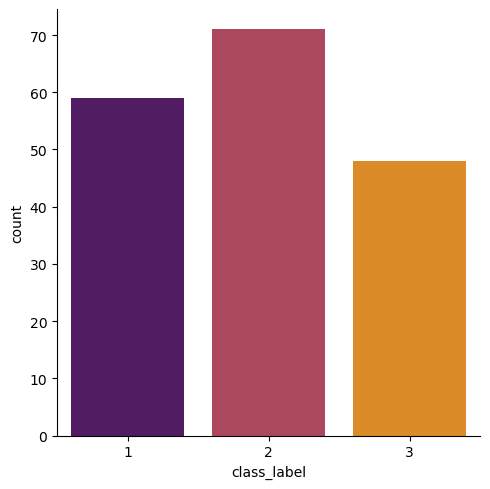

In [9]:
# Veamos como están distribuidas la categoría target 'class_label'
print(vino.groupby('class_label').size())
sns.catplot(x='class_label', data = vino, kind = "count", palette='inferno')

In [ ]:
# Está listo el dataset para buscar y entrenar modelos
# Falta estandarizar las características
# Vamos a usar un sencillo modelo, una regresión logística
# Armaremos un pipeline, pero primero separamos en train y test
# Vamos a aplicar cross validation, así que separamos el dataset en 'train' y 'test' solamennte
# Copiamos el dataframe original para no perder nada en otro y trabajamos sobre el otro
# LA IDEA ES APRENDER A RECONOCER LAS CARACTERÍSTICAS DE LOS tres tipos de uvas, APRENDIENDO DE LAS CARACTERÍSTICAS DEL DATASET.

vinos=vino.copy()   # lo preservamos
y=np.array(vinos['class_label'])    # definimos variable target
X=np.array(vinos.drop(['class_label'], axis=1))   # definimos dataset de características puras


# stratify=y hace que respete la distribución de las clases en y para muestrear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,
                                                    random_state = 6)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}') #%20
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}') #%80

X_train: (142, 13), y_train: (142,)
X_test: (36, 13), y_test: (36,)


In [47]:
# Definimos la pipeline para la regresión logística

# Dejamos los parámetros default, sólo tocamos random_state y n_jobs
pipe_log=make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=16, n_jobs=-1))

pipe_log.fit(X_train, y_train)   # entrenamos sobre el entrenamiento %80
y_pred_log=pipe_log.predict(X_test)  # predecimos sobre el testeo %20

In [48]:
print(classification_report(y_test, y_pred_log))

# precision: Proporción de predicciones correctas sobre todas las predicciones hechas para esa clase.
# recall: Proporción de verdaderos positivos sobre todos los casos reales de esa clase.
# f1-score: Media armónica entre precisión y recall (equilibrio entre ambos).
# support: Número de muestras reales de cada clase en el conjunto de prueba.
# weighted avg y macro avg son promedios ponderados y no ponderados.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.93      0.96        14
           3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



tn, fp, fn, tp = [12  0  0  0 13  1  0  0 10]
Val_accuracy= 97.22222222222221%


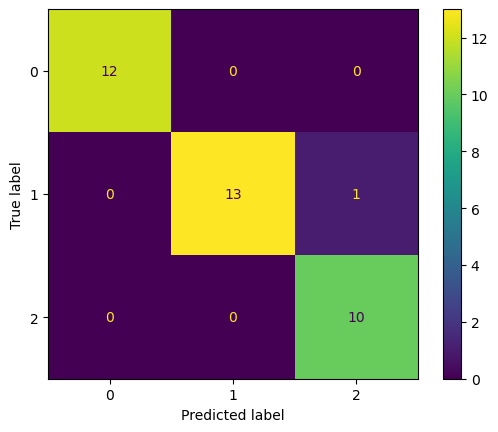

In [49]:
# Veamos qué obtuvimos, a través de la matriz de confusión
print(f'tn, fp, fn, tp = {confusion_matrix(y_test, y_pred_log).ravel()}')
# ahora más 'bonita'
conf1 = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(conf1).plot()
print(f'Val_accuracy= {100*pipe_log.score(X_test, y_test)}%')


In [ ]:
#🔹 Primera versión (con StratifiedKFold a mano)

# Se crea un generador de índices para validación cruzada estratificada
# n_splits=5 → divide el dataset en 5 folds
# shuffle=True → mezcla los datos antes de dividirlos
# random_state=1 → asegura que siempre se divida igual (reproducibilidad)
kfold = StratifiedKFold(n_splits=5, shuffle=True,
                        random_state=1).split(X_train, y_train)

# Lista vacía donde vamos a guardar los resultados (accuracy) de cada fold
scores = []

# Recorremos cada fold generado
# enumerate(kfold) devuelve (número de fold, (índices_train, índices_test))
for k, (train, test) in enumerate(kfold):
    
    # Entrenamos el pipeline 'pipe_log' con los datos de entrenamiento de este fold
    pipe_log.fit(X_train[train], y_train[train])
    
    # Evaluamos el modelo con los datos de validación de este fold
    score = pipe_log.score(X_train[test], y_train[test])
    
    # Guardamos el resultado de accuracy en la lista
    scores.append(score)
    
    # Imprimimos información:
    # np.bincount(y_train[train]) → cuenta cuántos ejemplos de cada clase hay en el set de entrenamiento
    # score → accuracy en ese fold
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))

# Una vez terminados los 5 folds:
# Calculamos el promedio y la desviación estándar de los accuracies
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# Imprimimos la lista completa de accuracies fold por fold
print(scores)


Fold:  1, Class dist.: [ 0 37 45 31], Acc: 1.000
Fold:  2, Class dist.: [ 0 37 45 31], Acc: 0.966
Fold:  3, Class dist.: [ 0 38 46 30], Acc: 1.000
Fold:  4, Class dist.: [ 0 38 46 30], Acc: 0.964
Fold:  5, Class dist.: [ 0 38 46 30], Acc: 0.964

CV accuracy: 0.979 +/- 0.017
[1.0, 0.9655172413793104, 1.0, 0.9642857142857143, 0.9642857142857143]


In [ ]:
# 🔹 Segunda versión (con cross_val_score)

# Ejecuta validación cruzada automáticamente
scores = cross_val_score(
    estimator=pipe_log,   # el modelo (pipeline en este caso)
    X=X_train,            # datos de entrenamiento (features)
    y=y_train,            # etiquetas/clases de entrenamiento
    cv=5,                 # número de folds = 5
    n_jobs=-1             # usa todos los núcleos disponibles para paralelizar
)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [1. 1. 1. 1. 1.]
CV accuracy: 1.000 +/- 0.000


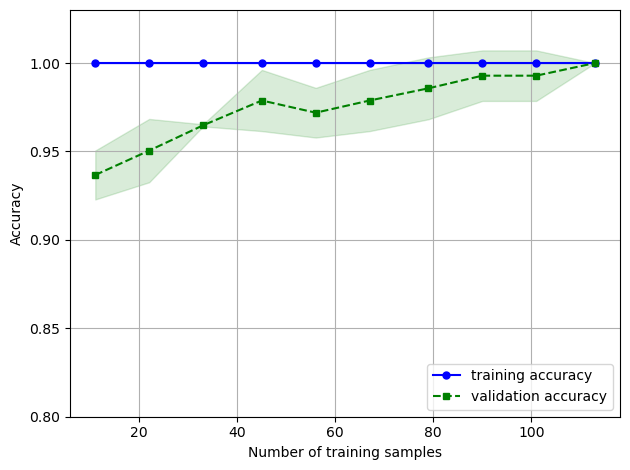

In [41]:
# Obtenemos las métricas para la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipe_log,                   # Modelo (pipeline en este caso)
    X=X_train,                            # Features de entrenamiento
    y=y_train,                            # Etiquetas de entrenamiento
    train_sizes=np.linspace(0.1, 1.0, 10),# Tamaños de entrenamiento (10% a 100%, en 10 pasos)
    cv=5,                                 # Validación cruzada con 5 folds
    n_jobs=-1                             # Usa todos los núcleos del procesador en paralelo
)

# Calculamos la media y desviación estándar de los accuracies de entrenamiento
train_mean = np.mean(train_scores, axis=1)  # Promedio de accuracy en training (por fold)
train_std = np.std(train_scores, axis=1)    # Variación en training (desvío estándar)

# Calculamos la media y desviación estándar de los accuracies de validación
test_mean = np.mean(test_scores, axis=1)    # Promedio de accuracy en validation (por fold)
test_std = np.std(test_scores, axis=1)      # Variación en validation (desvío estándar)

# ------------------------------------ TODO ESTO ES GRAFICO ---------------------------------------------
# -------------------------------------------------------------------------------------------------------
# Graficamos la curva de entrenamiento (línea azul)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o', markersize=5,
         label='training accuracy')

# Dibujamos el área sombreada de ±1 desviación estándar (incertidumbre)
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

# Graficamos la curva de validación (línea verde punteada)
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

# Dibujamos el área sombreada de ±1 desviación estándar en validación
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

# Opciones estéticas del gráfico
plt.grid()                         # Muestra la grilla de fondo
plt.xlabel('Number of training samples')  # Etiqueta eje X
plt.ylabel('Accuracy')                     # Etiqueta eje Y
plt.legend(loc='lower right')              # Leyenda (abajo a la derecha)
plt.ylim([0.8, 1.03])                      # Rango fijo del eje Y (para mejor comparación)
plt.tight_layout()                         # Ajusta márgenes para que no se corte nada

# -------------------------------------------------------------------------------------------------------
# ------------------------------------ TODO ESTO ES GRAFICO ---------------------------------------------

# Guardar el gráfico (opcional, está comentado)
# plt.savefig('images/06_05.png', dpi=300)

# Mostrar el gráfico en pantalla
plt.show()


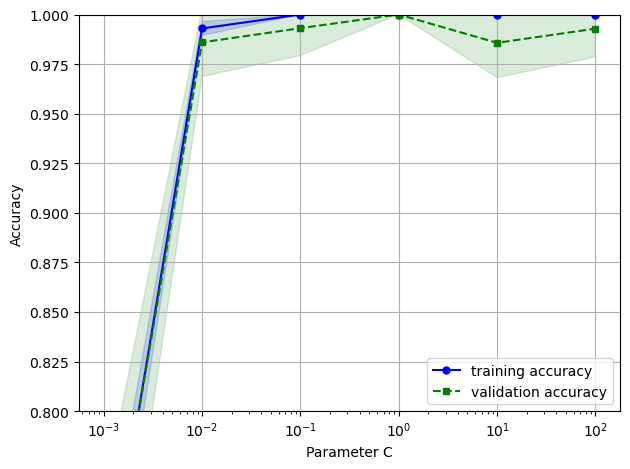

In [42]:
# Definimos los valores que va a tomar el hiperparámetro C
# testear cuál es el mejor para tu dataset.

# C es un hiperparámetro de regularización.
# Controla qué tanto penalizamos a los coeficientes grandes del modelo.
# C controla la fuerza de la regularización en LogisticRegression:

# - Valores pequeños = fuerte regularización (puede causar subajuste) El modelo se vuelve muy rígido, casi no aprende (Entrenamiento 72% accuracy, validación 70%)
# - Valores grandes = débil regularización (puede causar sobreajuste) El modelo es muy flexible → puede memorizar el dataset. ej 99% accuracy, validación 82%.
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Ejecutamos validation_curve para evaluar entrenamiento y validación (QUE PARAMETRO ES MEJOR DE param_range)
train_scores, test_scores = validation_curve(
                estimator=pipe_log,              # pipeline con LogisticRegression
                X=X_train,                       # features de entrenamiento
                y=y_train,                       # etiquetas
                param_name='logisticregression__C',  # hiperparámetro a variar
                param_range=param_range,         # valores de C que vamos a probar
                cv=5)                            # validación cruzada con 5 folds

# Calculamos la media y desviación estándar de los accuracies de entrenamiento
train_mean = np.mean(train_scores, axis=1)   # promedio por cada valor de C
train_std = np.std(train_scores, axis=1)     # variabilidad entre folds

# Calculamos la media y desviación estándar de los accuracies de validación
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# ------------------------------------ TODO ESTO ES GRAFICO ---------------------------------------------
# -------------------------------------------------------------------------------------------------------
# Dibujamos la curva de entrenamiento (línea azul)
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

# Área sombreada ±1 std para training
plt.fill_between(param_range, 
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

# Dibujamos la curva de validación (línea verde punteada)
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

# Área sombreada ±1 std para validation
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

# Ajustes de visualización
plt.grid()                         # activa la grilla
plt.xscale('log')                  # escala logarítmica en el eje X (porque C varía mucho)
plt.legend(loc='lower right')      # leyenda abajo a la derecha
plt.xlabel('Parameter C')          # etiqueta eje X
plt.ylabel('Accuracy')             # etiqueta eje Y
plt.ylim([0.8, 1.0])               # rango fijo del eje Y
plt.tight_layout()                 # ajusta márgenes

# -------------------------------------------------------------------------------------------------------
# ------------------------------------ TODO ESTO ES GRAFICO ---------------------------------------------
# Guardar imagen (opcional, comentado)
# plt.savefig('images/06_06.png', dpi=300)

# Mostrar gráfico
plt.show()


In [44]:
# ## Ajustar hiperparámetros con la búsqueda randomizada y de cuadrículas
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

# Definimos un pipeline con estandarización de datos + SVM
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

# Definimos un rango de valores candidatos para los hiperparámetros C y gamma
# C → controla la regularización
# gamma → controla la influencia de cada muestra en el kernel RBF
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# Definimos la rejilla de combinaciones de hiperparámetros
# Caso 1: kernel lineal, probando distintos valores de C
# Caso 2: kernel RBF, probando C y gamma
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

# Usamos RandomizedSearchCV para buscar la mejor combinación de hiperparámetros
# n_iter=60 → va a probar 60 combinaciones al azar en lugar de todas (más rápido)
# scoring='accuracy' → evaluamos con accuracy
# cv=5 → validación cruzada con 5 folds
# n_jobs=-1 → usa todos los núcleos del procesador
gs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        n_iter=60,
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)

# Ajustamos la búsqueda sobre los datos de entrenamiento
gs = gs.fit(X_train, y_train)

# Mostramos el mejor score promedio obtenido en validación cruzada
print(f'{gs.best_score_*100} %')

# Mostramos qué hiperparámetros dieron ese mejor score
print(gs.best_params_)

# Recuperamos el mejor modelo encontrado por la búsqueda
clf = gs.best_estimator_

# Lo entrenamos sobre todo el conjunto de entrenamiento (80%)
clf.fit(X_train, y_train)

# Finalmente, evaluamos el modelo en el conjunto de test (20% restante)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))


100.0 %
{'svc__kernel': 'rbf', 'svc__gamma': 0.01, 'svc__C': 1.0}
Test accuracy: 0.944
